In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
# loading dataset
mall_customers = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
print(mall_customers.shape)
mall_customers.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# checking for duplicates
mall_customers.CustomerID.unique().shape

(200,)

In [4]:
# dropping id column
mall_customers.drop(['CustomerID'], axis=1, inplace=True)
print(mall_customers.shape)
mall_customers.head()

(200, 4)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
mall_customers.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# checking for missing values
mall_customers.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# value counts for gender column
mall_customers['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [8]:
# getting statistical info
mall_customers.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
# loading packages for data exploration
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

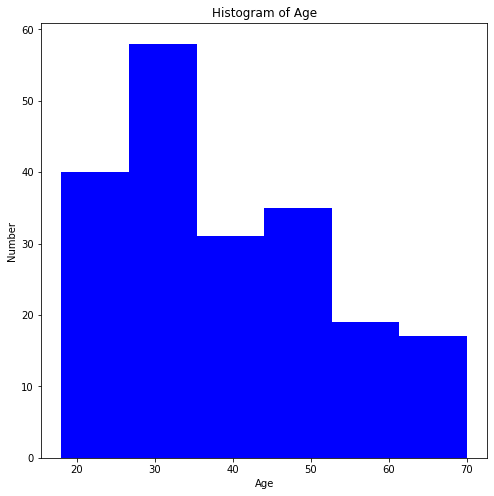

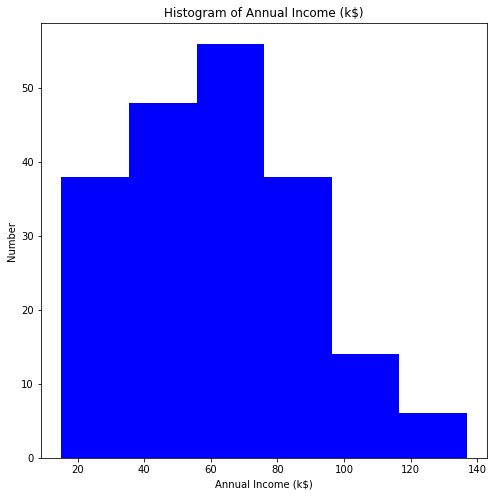

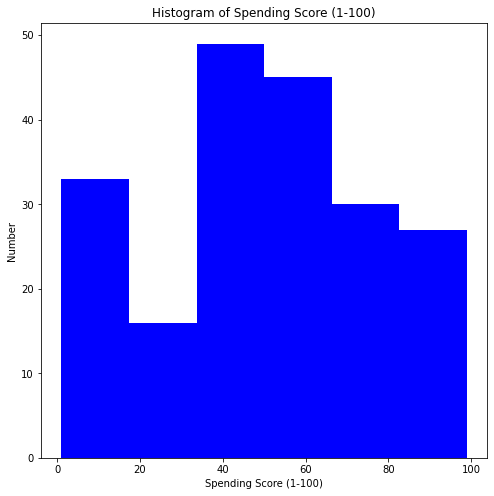

In [10]:
# plotting a histogram for numerical columns
def plot_histogram(df, cols, bins=6):
    for col in cols:
        fig = plt.figure(figsize=(8,8))
        ax= fig.gca()
        df[col].plot.hist(ax = ax, bins = bins, color = 'blue')
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number')
        plt.show()
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plot_histogram(mall_customers, num_cols)

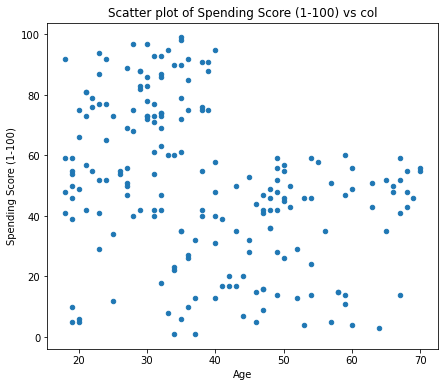

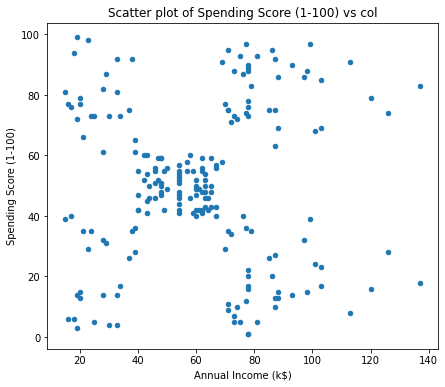

In [11]:
# creating a scatter plot for age & annual income against spending score
def scatter_plot(df, cols, col_y):
    for col in cols:
        fig = plt.figure(figsize = (7,6))
        ax = fig.gca()
        df.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs ' + 'col')
        ax.set_xlabel(col)
        ax.set_ylabel(col_y)
        plt.show()
num_cols = ['Age', 'Annual Income (k$)']

scatter_plot(mall_customers, num_cols, 'Spending Score (1-100)')

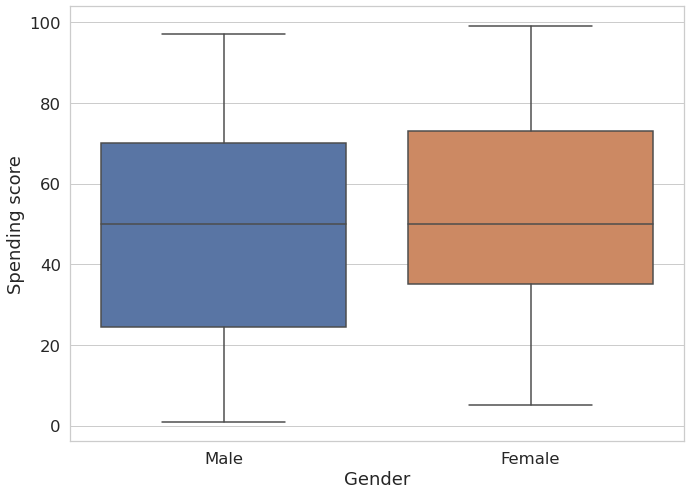

In [12]:
# relationship between gender & spending score
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x = 'Gender', y = 'Spending Score (1-100)', data = mall_customers)
plt.xlabel('Gender')
plt.ylabel('Spending score')
plt.show()

In [13]:
# creating the gender marker
marker_dic = {'Male':'^', 'Female':'x'}
markers = [marker_dic[x] for x in mall_customers['Gender']]

In [14]:
# importing packages for kmeans clustering
import numpy.random as nr
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

In [15]:
# label encoding gender column
enc = preprocessing.LabelEncoder()
enc.fit(mall_customers['Gender'])
mall_customers['Gender'] = enc.transform(mall_customers['Gender'])
mall_customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [16]:
nr.seed(2233)
# mapping cluster assignment numbers to colours for visualization
col_dic = {0:'blue',1:'green',2:'orange',3:'gray',4:'magenta',5:'black'}
# defining a k=2 kmeans cluster model
kmeans_2 = KMeans(n_clusters=2, random_state=0)
# fitting data into the model
assignments_km2 = kmeans_2.fit_predict(mall_customers)
# mapping the cluster numbers to the colours
assign_color_km2 = [col_dic[x] for x in assignments_km2]

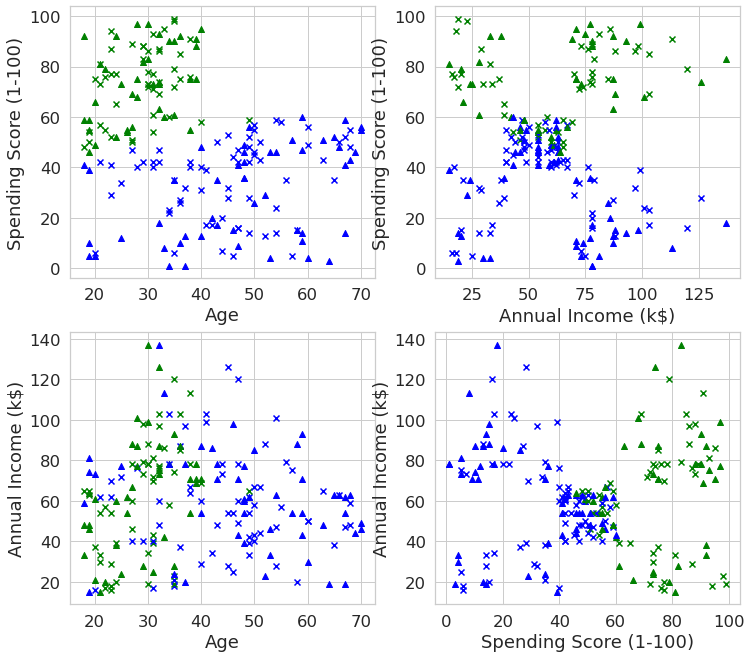

In [17]:

# displaying cluster assignments for k=2 models
def plot_cluster(df, assign_color, markers):
    fig, ax = plt.subplots(2, 2, figsize=(12,11)) # define plot area         
    x_cols = ['Age', 'Annual Income (k$)', 'Age', 'Spending Score (1-100)']
    y_cols = ['Spending Score (1-100)', 'Spending Score (1-100)', 'Annual Income (k$)', 'Annual Income (k$)']
    for x_col,y_col,i,j in zip(x_cols,y_cols,[0,0,1,1],[0,1,0,1]):
        for x,y,c,m in zip(mall_customers[x_col], mall_customers[y_col], assign_color, markers):
            ax[i,j].scatter(x,y, color = c, marker = m)
        ax[i,j].set_xlabel(x_col) # Set text for the x axis
        ax[i,j].set_ylabel(y_col)# Set text for y axis
    plt.show()

plot_cluster(mall_customers, assign_color_km2, markers)

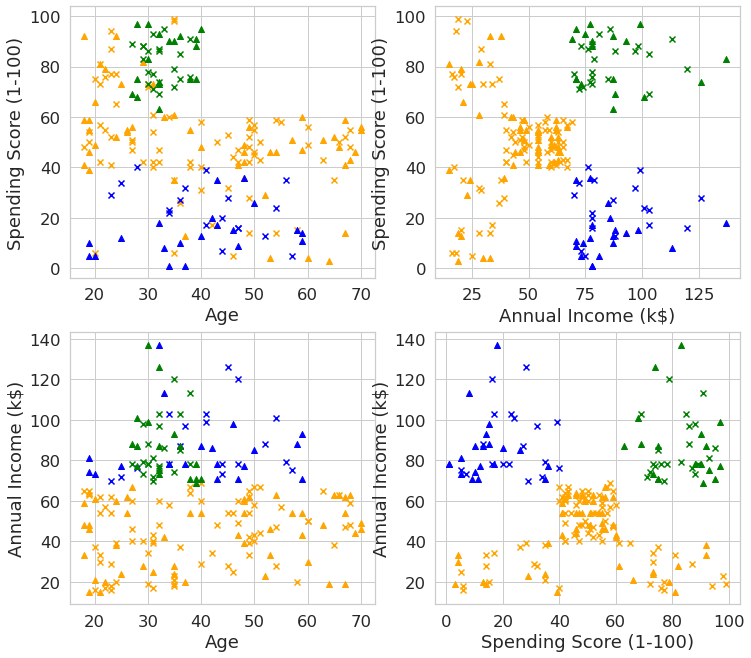

In [18]:
# defining k=3 cluster model
nr.seed(4455)
kmeans_3 = KMeans(n_clusters=3, random_state=0)
assignments_km3 = kmeans_3.fit_predict(mall_customers)
assign_color_km3 = [col_dic[x] for x in assignments_km3]
plot_cluster(mall_customers, assign_color_km3, markers)

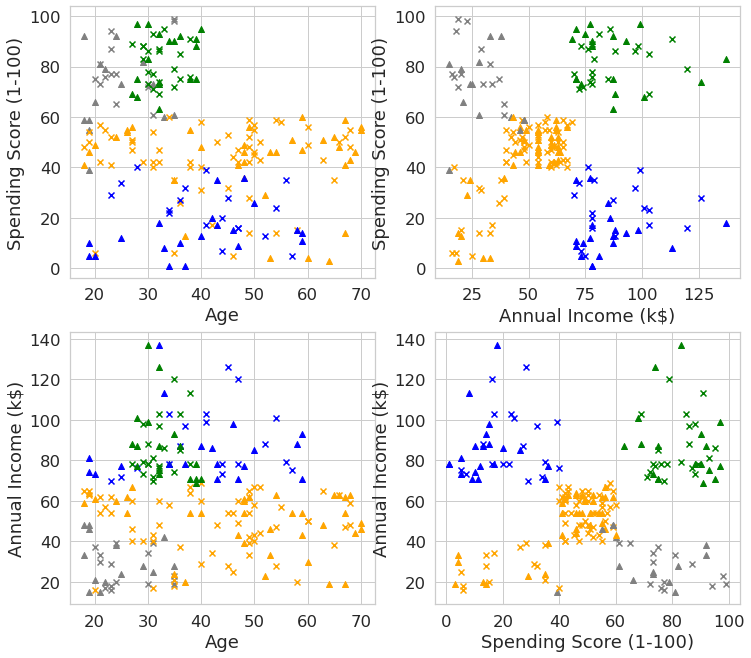

In [19]:
# defining k=4 cluster model
nr.seed(223)
kmeans_4 = KMeans(n_clusters=4, random_state=0)
assignments_km4 = kmeans_4.fit_predict(mall_customers)
assign_color_km4 = [col_dic[x] for x in assignments_km4]
plot_cluster(mall_customers, assign_color_km4, markers)


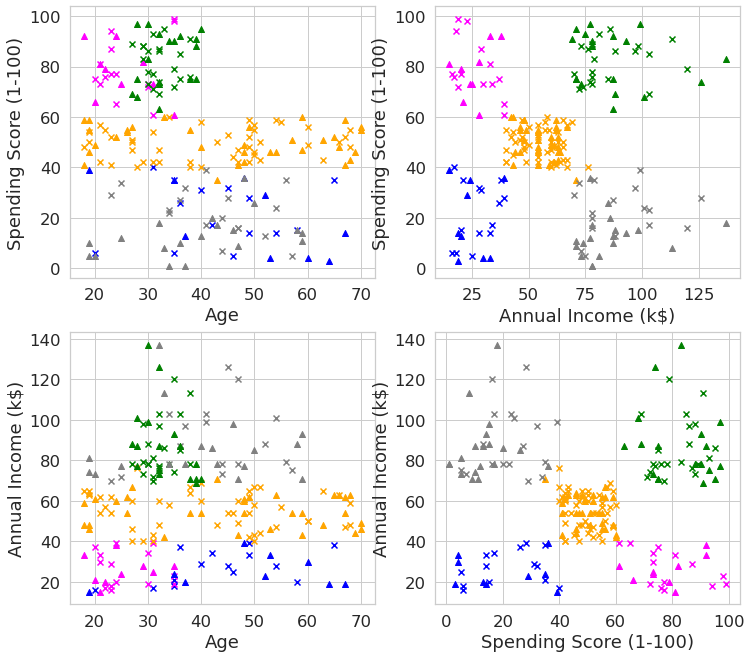

In [20]:
# defining k=5 cluster model
nr.seed(4443)
kmeans_5 = KMeans(n_clusters=5, random_state=0)
assignments_km5 = kmeans_5.fit_predict(mall_customers)
assign_color_km5 = [col_dic[x] for x in assignments_km5]
plot_cluster(mall_customers, assign_color_km5, markers)

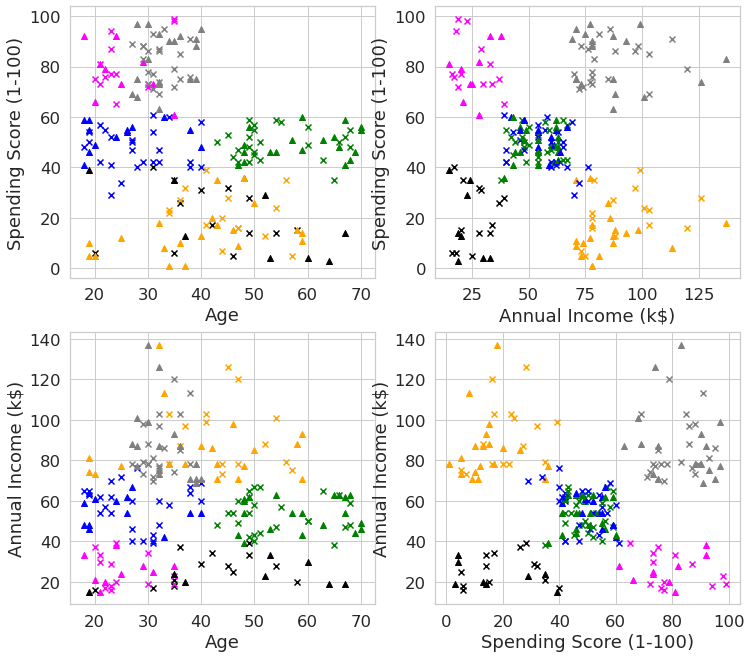

In [21]:
# defining k=6 cluster model
nr.seed(2288)
kmeans_6 = KMeans(n_clusters=6, random_state=0)
assignments_km6 = kmeans_6.fit_predict(mall_customers)
assign_color_km6 = [col_dic[x] for x in assignments_km6]
plot_cluster(mall_customers, assign_color_km6, markers)

[212889.44245524294, 143391.59236035674, 104414.67534220174, 75399.61541401486, 58348.64136331505]


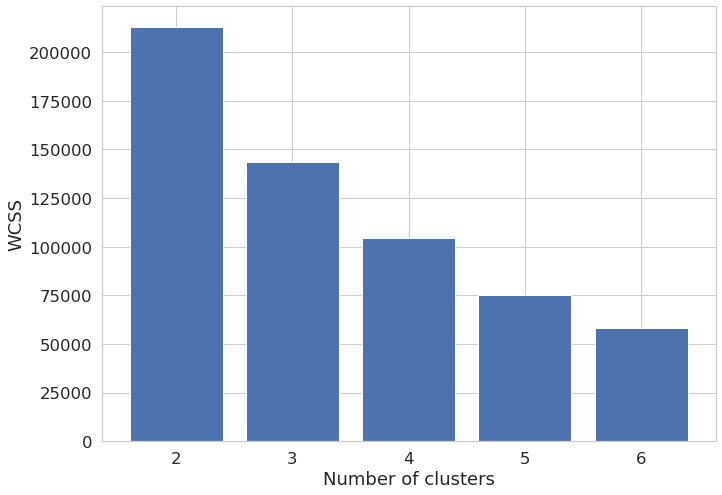

In [22]:
# evaluating cluster models using the within cluster sum of sqaures(measures how tight the clusters are)

km_models = [kmeans_2, kmeans_3, kmeans_4, kmeans_5, kmeans_6]

def plot_WCSS_km(km_models, samples):
    
    ## Plot WCSS
    wcss = [mod.inertia_ for mod in km_models]
    print(wcss)
    n_clusts = [x for x in range(2,len(wcss) + 2)]
    plt.bar(n_clusts, wcss)
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    

plot_WCSS_km(km_models, mall_customers)

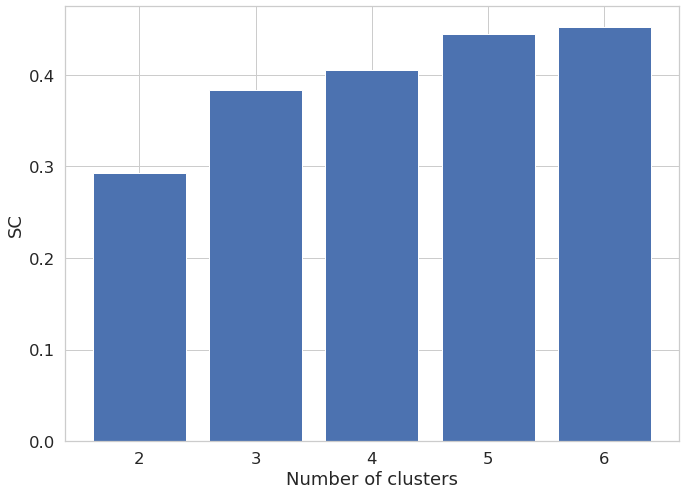

In [23]:
# Evaluating the models using silhouette coefficient
assignment_list = [assignments_km2, assignments_km3, assignments_km4, assignments_km5, assignments_km6]

def plot_sillohette(samples, assignments, x_lab = 'Number of clusters'):
    silhouette = [silhouette_score(samples, a) for a in assignments]
    n_clusts = range(2, len(silhouette) + 2)
    plt.bar(n_clusts, silhouette)
    plt.xlabel(x_lab)
    plt.ylabel('SC')
    plt.show()

plot_sillohette(mall_customers, assignment_list)